In [13]:
from AnalysisTools.EventDisplay import EventDisplay
import numpy as np
import matplotlib.pyplot as plt

E = 1
nMax=1000
time_bins=np.linspace(0,10,6)
ProcessString=None
ProcessStringName = ProcessString if ProcessString else 'AllPhotons'
particle='electron'

ED = EventDisplay('SimulationOutputs/BatchOutput/%s_gun_E_%s_sim_output.root'%(particle,str(E)),time_bins=time_bins)
template = ED.CalculateAvgTemplate(nMax=nMax,ProcessString=ProcessString,
                                    template_string='AverageTemplates/%s_gun_E_%s_%s_template.json'%(particle,str(E),
                                                                                                     ProcessStringName))
                                   

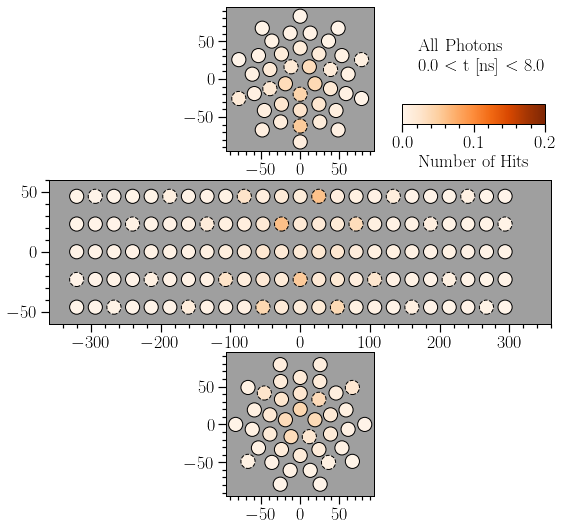

In [14]:
ED.PlotAvgTemplate(vmax=float(E)/5.,time_bin=range(4),
                   ProcessString=ProcessString,
                   SaveString='Figures/AverageTemplates/%s_%s_AvgTemplate_E%s.png'%(particle,
                                                                                 ProcessStringName,
                                                                                 str(E)))


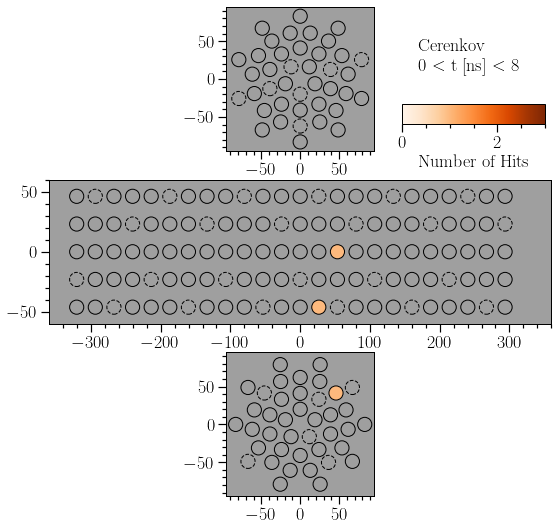

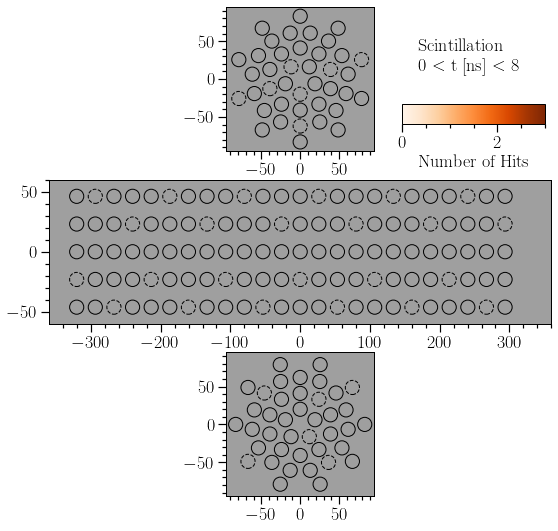

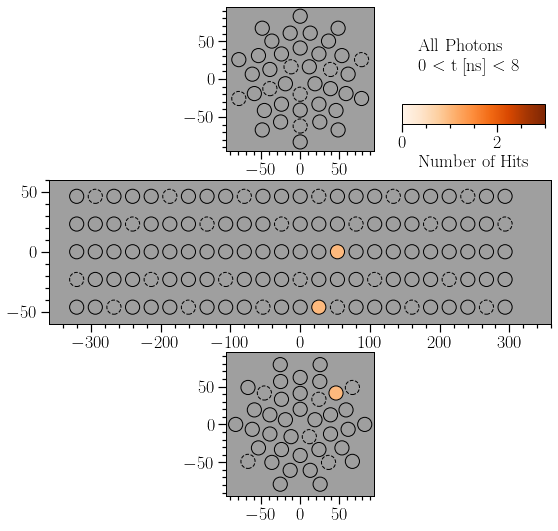

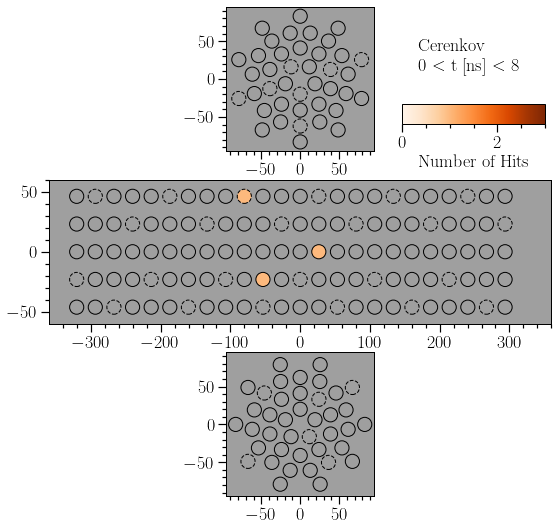

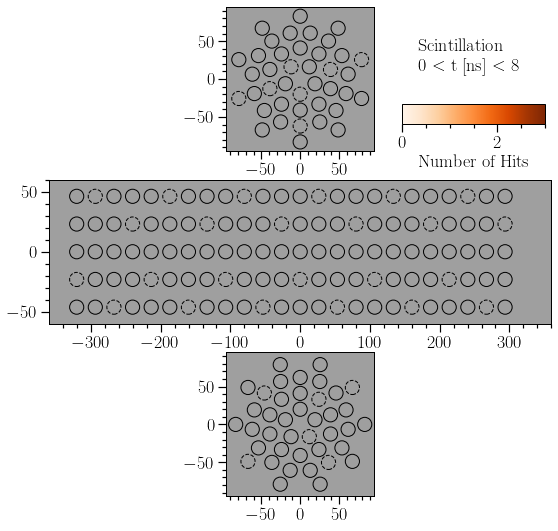

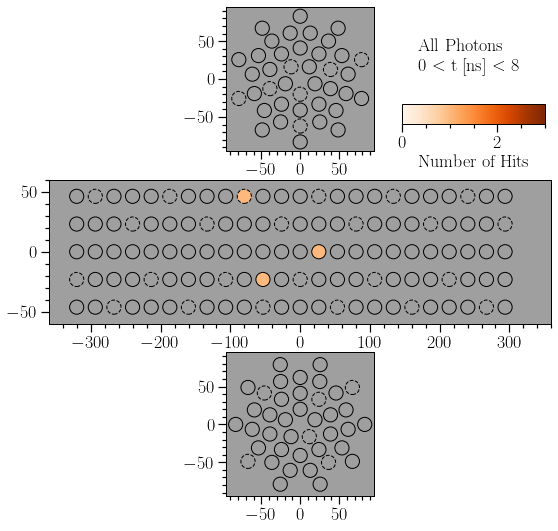

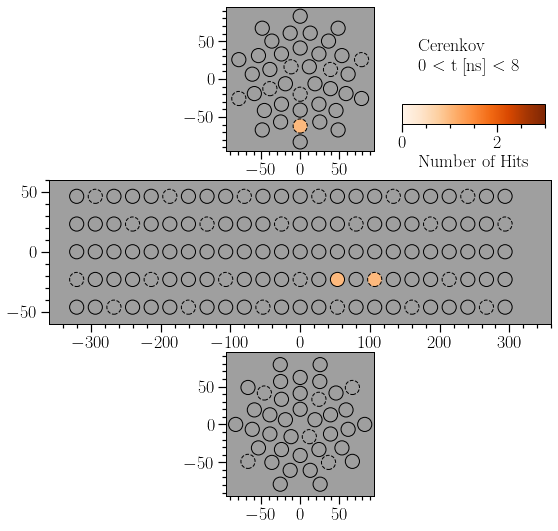

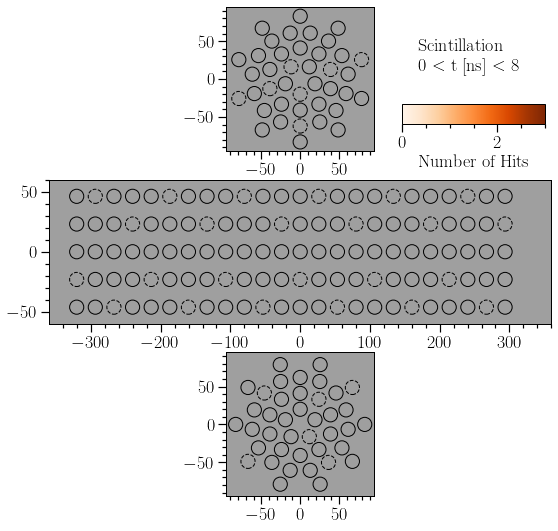

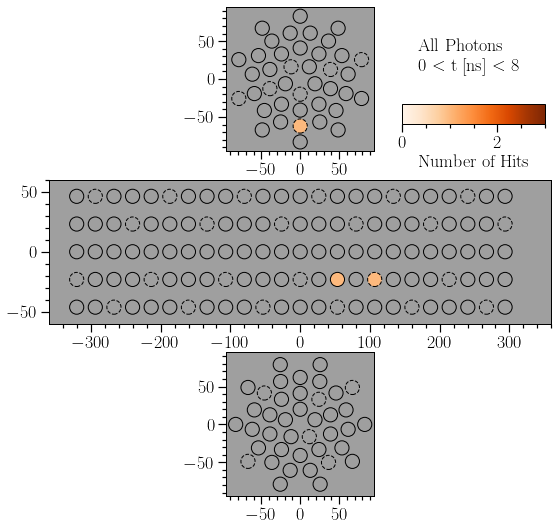

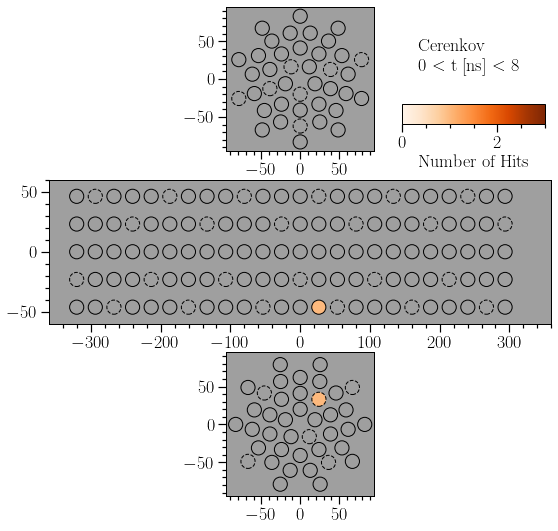

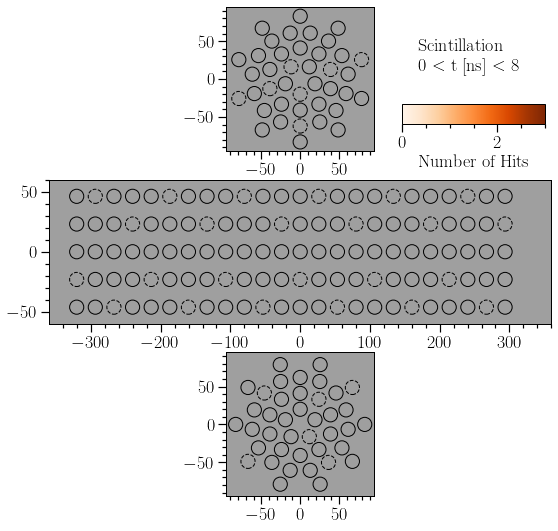

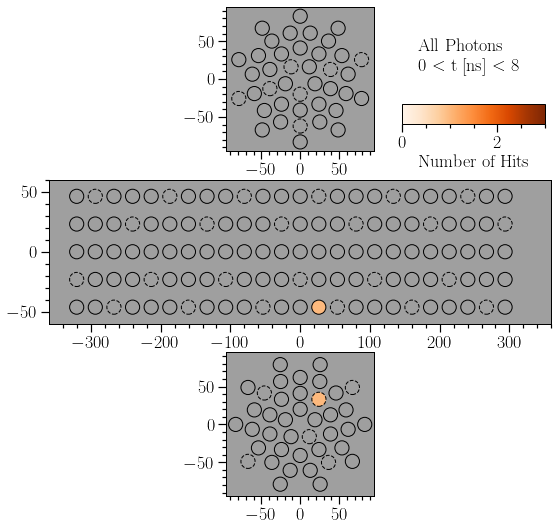

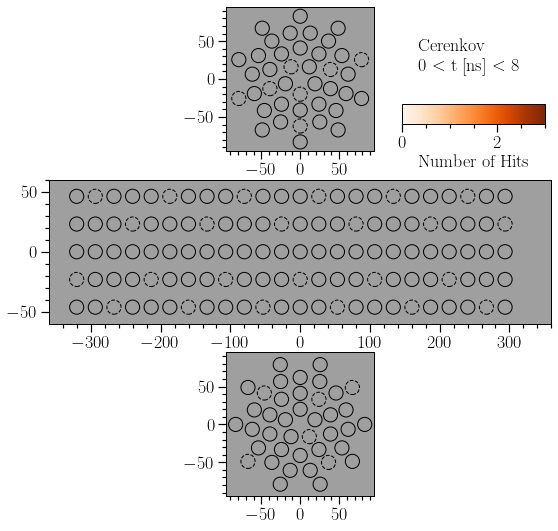

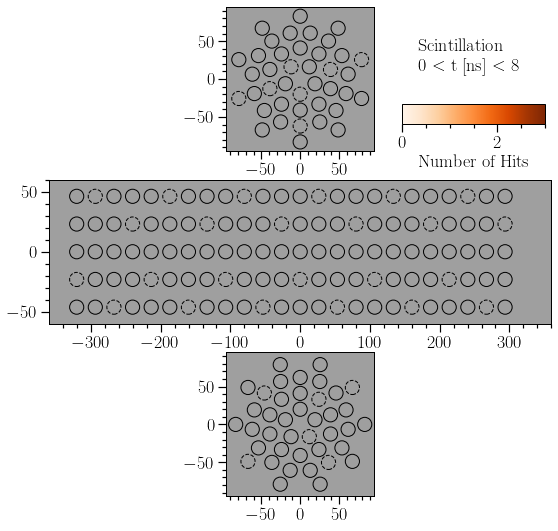

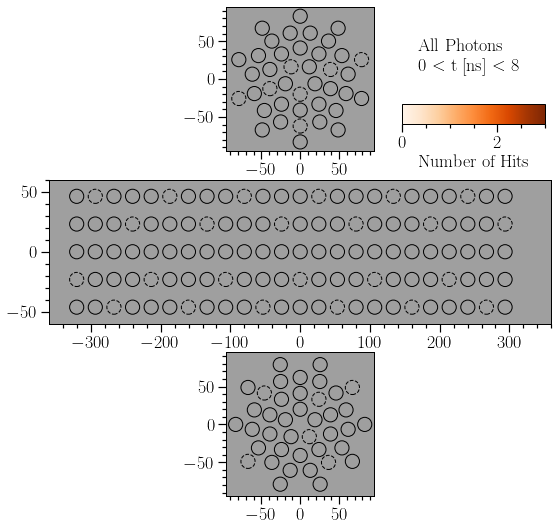

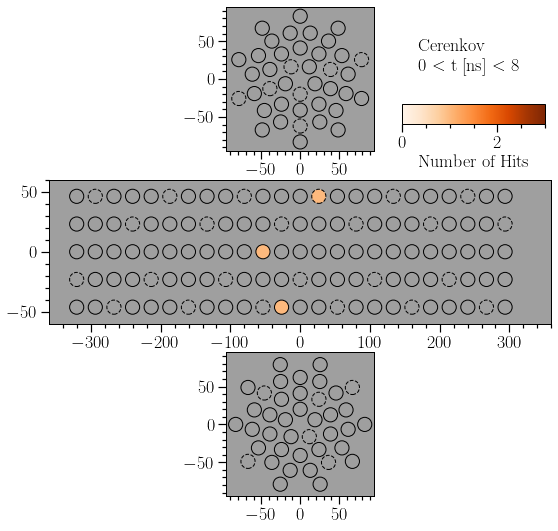

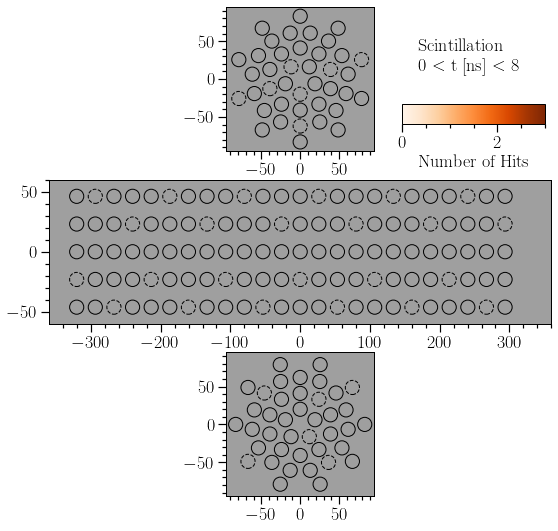

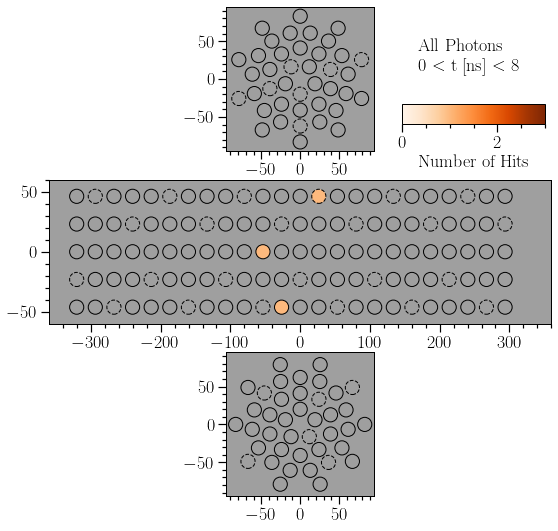

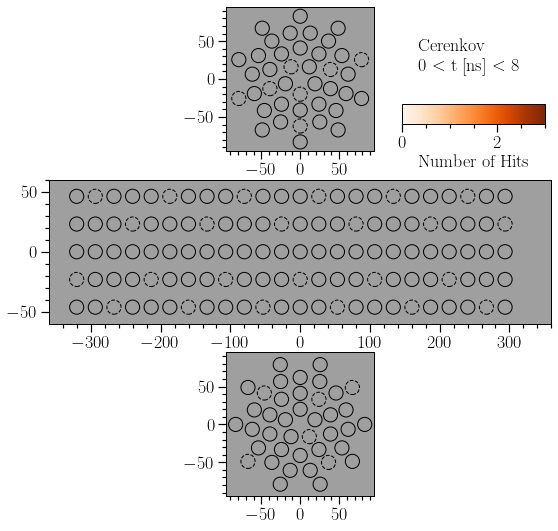

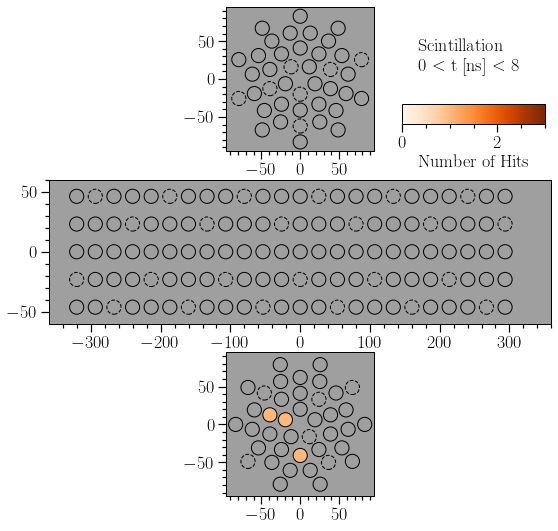

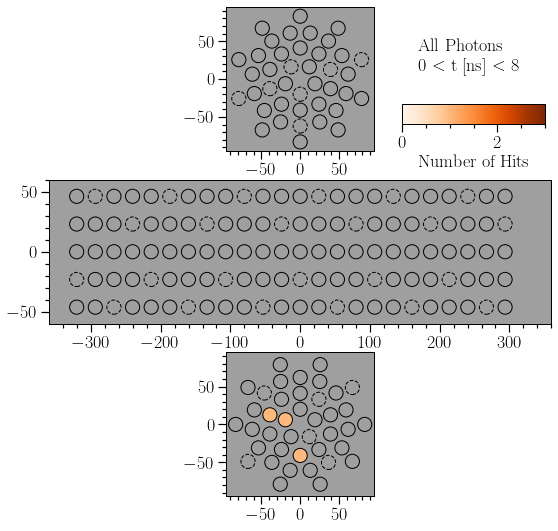

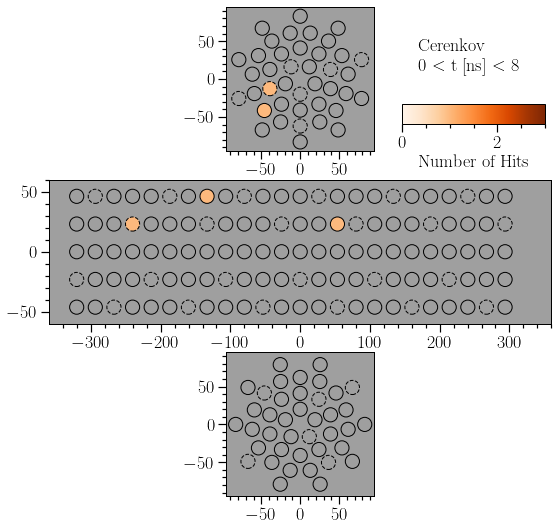

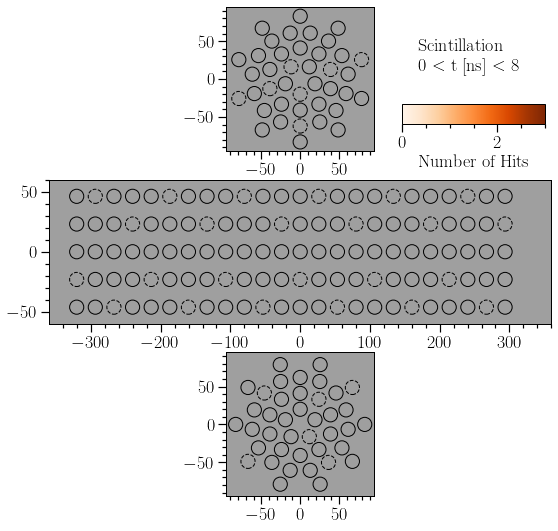

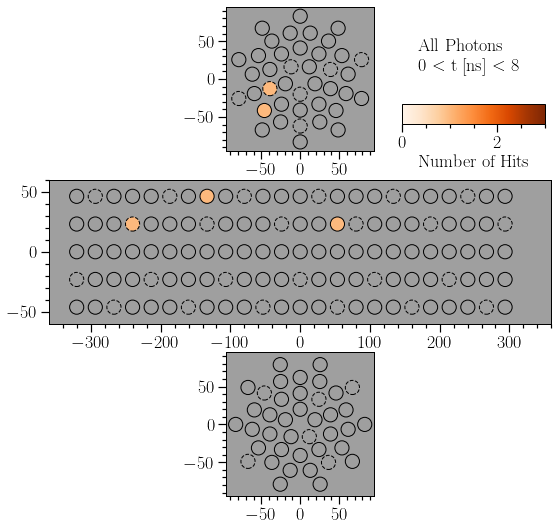

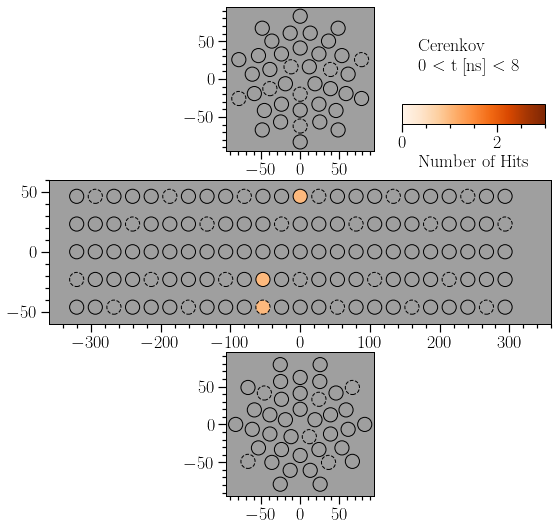

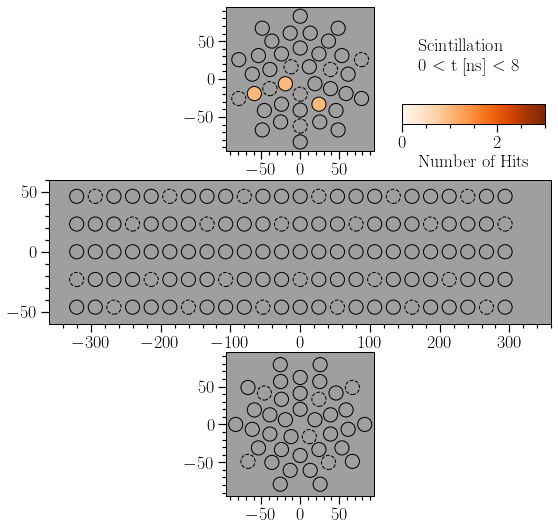

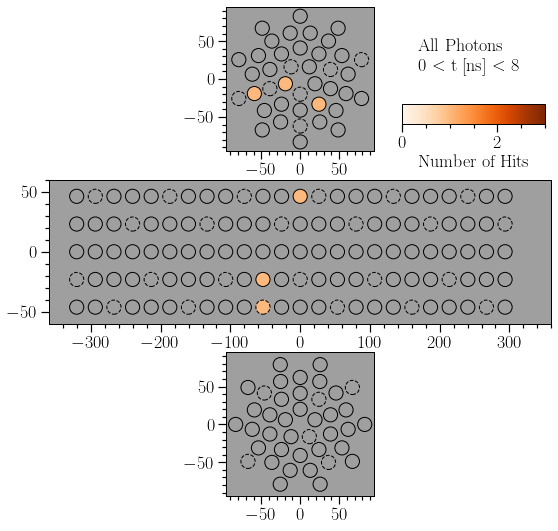

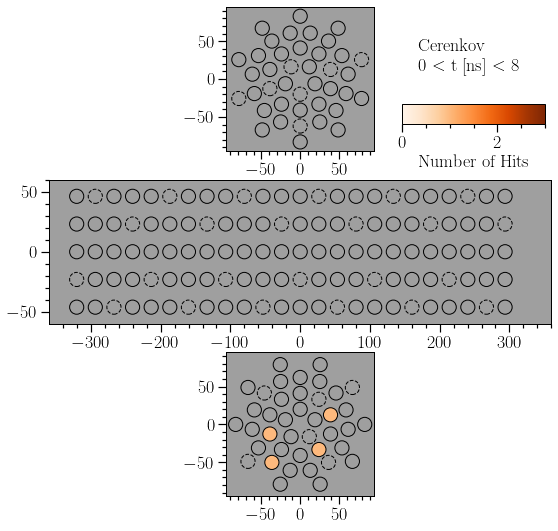

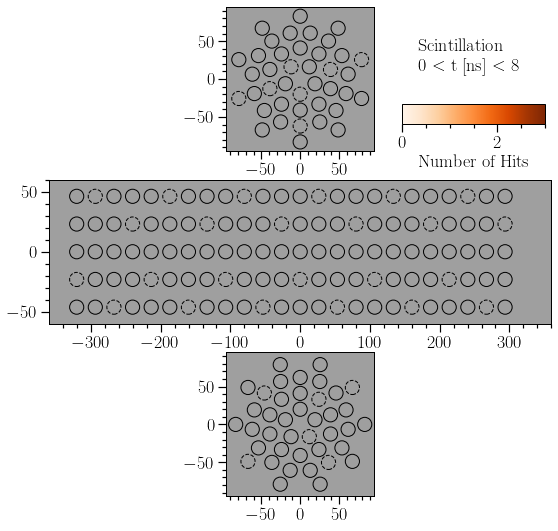

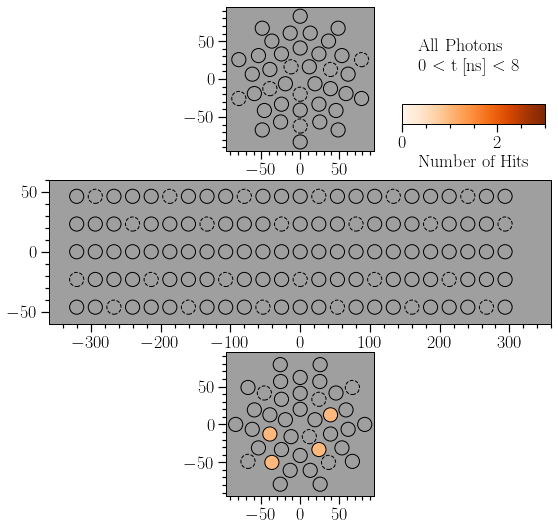

In [15]:
for evenno in range(10):
  for ProcessString in ['Cerenkov','Scintillation',None]:
    SaveStr = 'Figures/EventDisplays/%s_E%s_event%i'%(ProcessString if ProcessString is not None else 'AllPhotons',E,evenno)
    ED.PlotAllPMTsTimeSlice(evenno,(0,8),ProcessString=ProcessString,vmax=3,SaveString=SaveStr,DetReco=True)

In [26]:
gif = ED.PlotAllPMTsTimeGif(3,time_width=2,ProcessString='Cerenkov',SaveString='Figures/testED.mp4')